# Lesson 0034 - Reuters Classification Neural Network (II)
In this lesson, we extend the approach from [lesson 0033](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0033_reuters_classification_neural_network.ipynb): instead of learning a high dimensional model, we employ an embedding in order to project the high dimensional space of words down to a low dimensional space.<br>
We start by stealing code from [lesson 0033](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0033_reuters_classification_neural_network.ipynb):

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.reuters.load_data( num_words = 10000 )

In [3]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


Next, we transform the training and the test data.<br>
First, we find out, how long the sequences are, and then, we cut the sequences to a length, so that $30\%$ of the sequences are shorter than this maximum length. Our reasoning for this is, that we assume, that the beginning of a given text contains a lot of information about the subject. Also, we restrict the dimensionality of our problem this way. This way, we limit the size of the sequences, but we do not lose too much information. Then, we fill those sequences, that are shorter, with $0$s.<br>
We employ [round](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.round_.html) for rounding and [minimum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.minimum.html) to find the maximum length we can write.<br>
We reduce the maximum length of the sequences because we cut the first $3$ values because these acutally are not part of the text as we learnt in [lesson 0033](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0033_reuters_classification_neural_network.ipynb).

In [4]:
length = np.zeros( shape = [ len( train_x ) ] )

                            
    
                            
for i in range( len( train_x ) ):
    
    length[ i ] = len( train_x[ i ] )
        


        
length = np.sort( length )
                            
                        
        
        
max_length = np.int32( length[ np.int32( np.round( 0.3 * len( length ) ) ) ] - 3 )



train_x_encoded = np.zeros( shape = [ len( train_x ), max_length ] )

test_x_encoded = np.zeros( shape = [ len( test_x ), max_length ] )

train_y_encoded = np.zeros( shape = [ len( train_x ), 46 ] )

test_y_encoded = np.zeros( shape = [ len( test_x ), 46 ] )




for i in range( len( train_x ) ):
    
    current_max = np.int32( np.minimum( max_length + 3, len( train_x[ i ] ) ) )
    
    for j in range( 3, current_max ):
        
        train_x_encoded[ i, j - 3 ] = train_x[ i ][ j ]
        
for i in range( len( test_x ) ):
    
    current_max = np.int32( np.minimum( max_length + 3, len( test_x[ i ] ) ) )
    
    for j in range( 3, current_max ):
        
        test_x_encoded[ i, j - 3 ] = test_x[ i ][ j ]
        
for i in range( len( train_x ) ):
    
    train_y_encoded[ i, train_y[ i ] ] = 1
               
for i in range( len( test_x ) ):
    
    test_y_encoded[ i, test_y[ i ] ] = 1
    
    
    
    
train_x = train_x_encoded

train_y = train_y_encoded

test_x = test_x_encoded

test_y = test_y_encoded

In [5]:
import keras
from keras import models
from keras import layers

print( keras.__version__ )

2.2.4


Using TensorFlow backend.


Now, we build the model.<br>
We employ [Embedding](https://keras.io/layers/embeddings/) to map the $10000$ dimensional word space vector to a $2$ dimensional vector. We then employ [Flatten](https://keras.io/layers/core/) to transform the embedding tensor into a column tensor.

In [6]:
network = models.Sequential()

network.add( layers.Embedding( 10000, 2, input_length = max_length ) )

network.add( layers.Flatten() )

network.add( layers.Dense( 512, activation = layers.LeakyReLU( alpha = 0.3 ) ) )

network.add( layers.Dense( 46, activation = "softmax" ) )

network.compile( optimizer = keras.optimizers.SGD( lr = 0.1, momentum = 0.0, decay = 0.0, nesterov = False ),
               loss = "categorical_crossentropy", metrics = [ "accuracy" ] )

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\rhopi\Anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [7]:
history = network.fit( train_x, train_y, epochs = 100, batch_size = 100, validation_data = ( test_x, test_y ) )

Instructions for updating:
Use tf.cast instead.
Train on 8982 samples, validate on 2246 samples
Epoch 1/100
8982/8982 [==============================] - 2s 268us/step - loss: 2.7225 - acc: 0.3592 - val_loss: 2.2677 - val_acc: 0.4452
Epoch 2/100
8982/8982 [==============================] - 0s 31us/step - loss: 2.1462 - acc: 0.4664 - val_loss: 2.0900 - val_acc: 0.4866
Epoch 3/100
8982/8982 [==============================] - 0s 30us/step - loss: 2.0484 - acc: 0.4886 - val_loss: 2.0497 - val_acc: 0.5058
Epoch 4/100
8982/8982 [==============================] - 0s 30us/step - loss: 2.0053 - acc: 0.5052 - val_loss: 2.0154 - val_acc: 0.5129
Epoch 5/100
8982/8982 [==============================] - 0s 31us/step - loss: 1.9576 - acc: 0.5174 - val_loss: 1.9675 - val_acc: 0.5232
Epoch 6/100
8982/8982 [==============================] - 0s 32us/step - loss: 1.8930 - acc: 0.5247 - val_loss: 1.8959 - val_acc: 0.5312
Epoch 7/100
8982/8982 [==============================] - 0s 31us/step - loss: 1.8136 - 

8982/8982 [==============================] - 0s 31us/step - loss: 0.9204 - acc: 0.7646 - val_loss: 1.4906 - val_acc: 0.6483
Epoch 59/100
8982/8982 [==============================] - 0s 31us/step - loss: 0.9174 - acc: 0.7683 - val_loss: 1.4902 - val_acc: 0.6545
Epoch 60/100
8982/8982 [==============================] - 0s 31us/step - loss: 0.9096 - acc: 0.7707 - val_loss: 1.5108 - val_acc: 0.6492
Epoch 61/100
8982/8982 [==============================] - 0s 31us/step - loss: 0.8950 - acc: 0.7723 - val_loss: 1.5019 - val_acc: 0.6478
Epoch 62/100
8982/8982 [==============================] - 0s 31us/step - loss: 0.8856 - acc: 0.7751 - val_loss: 1.5424 - val_acc: 0.6434
Epoch 63/100
8982/8982 [==============================] - 0s 31us/step - loss: 0.8813 - acc: 0.7754 - val_loss: 1.5148 - val_acc: 0.6523
Epoch 64/100
8982/8982 [==============================] - 0s 31us/step - loss: 0.8669 - acc: 0.7780 - val_loss: 1.5232 - val_acc: 0.6518
Epoch 65/100
8982/8982 [==============================

In [8]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


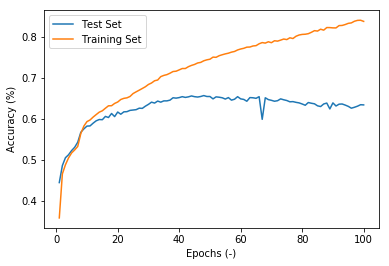

In [9]:
epochs = range( 1, len( history.history[ 'val_acc' ] ) + 1 )

plt.plot( epochs, history.history[ 'val_acc' ], label = "Test Set" )

plt.plot( epochs, history.history[ 'acc' ], label = "Training Set" )

plt.xlabel( "Epochs (-)" )

plt.ylabel( "Accuracy (%)" )

plt.legend()

We see a maximum in accuracy on the test set after around $40$ epochs, yet this performance is worse than the performance we achieved in [lesson 0033](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0033_reuters_classification_neural_network.ipynb).<br>
Class dismissed.